**Proyecto final**

Valentina Duarte Cardona 

CC 1000319349

**Ejercicio**

La posición de un oscilador armónico amortiguado de masa *m* = 1*kg* está descrita por la ecuación diferencial de segundo orden:

 \begin{equation} 
\tag{1}
\dfrac{d^2x}{dt^2}+\Gamma \dfrac{dx}{dt} +\omega^2x=0
\end{equation}

donde $\gamma$ es el coeficiente de fricción y $\omega$ la frecuencia natural del sistema.La solucióna a esta ecuación diferencial de segundo orden depende de dos condiciones iniciales $x(0)$ y $x'(0)$

1. Reescriba la ecuación diferencial de segundo orden como un sistema de dos ecuaciones diferenciales de primer orden, de la forma:

$$ \frac{dy}{dt}=y'=f(t,y) $$


Realizando el cambio de variable $\frac{dx}{dt}=v$, podemos cambiar la ecuación diferencial de segundo orden, por dos de primer orden de la siguiente manera:

$$\frac{dx}{dt}=v = g_0(x,v,t)$$
$$\frac{dv}{dt}=-\gamma v - \omega^2 x=g_1(x,v,t)$$

Demuestre las expresiones analíticas para la solución numérica RK2.

Considerando la siguiente ecuación diferencial 

$$ \frac{dy}{dt}=y'=f(t,y),\quad\hbox{ con }\quad a\leq t\leq b, \quad y(a) = \alpha, $$

Para encontrar la función primero se integra la ecuación anterior en el intervalo $[t,t+h]$

$$y(t+h)=y(t)+\int_t^{t+h}f(t',y(t'))dt'$$

Luego realizando una expansión de taylor alrededor del punto medio $t_{h/2}=t+h/2$, 

$$f(t',y(t'))=f(t_{h/2},y(t_{h/2}))+(t'-t_{h/2})\frac{d}{dt}f(t_{h/2},y(t_{h/2}))+O(h^2),$$

y volviendo a integrar

$$\int_t^{t+h}f(t',y(t'))dt' = \int_t^{t+h}f(t_{h/2},y(t_{h/2}))dt' + \int_t^{t+h}(t'-t_{h/2})\frac{d}{dt}f(t_{h/2},y(t_{h/2}))  $$

La integral del primer término da $hf(t_{h/2},y(t_{h/2}))$ y la integral del segundo término da cero.


$$
\begin{align}
\int_t^{t+h} (t'-t_{h/2})\,dt'
  =&\,\frac{1}{2}(t'-t_{h/2})^2\Big|_t^{t+h} \\
  =&\,\frac{1}{2}\left(t+h-t-\frac{h}{2}\right)^2-\frac{1}{2}\left(t-t-\frac{h}{2}\right)^2\\
  =&\,0.
\end{align}
$$

Obteniendo

$$y(t+h)=y(t)+hf(t_{h/2},y(t_{h/2}))$$

para conocer $y(t_{h/2})$ se realiza la expansión de Taylor alrededor de $t$ al primer orden, lo que da 

$$y(t_{h/2})\approx y(t)+(t_{h/2}-t)\frac{d}{dt}y(t)=y(t)+\frac{h}{2}f(t,y(t)).$$

donde se ha usado que $y'=f(t,y(t))$ y $(t_{h/2}-t)=h/2$, finalmente si definimos las constantes $k_1$ y $k_2$ se tiene el algoritmo de rk2,

\begin{align}
k_1   =&\, hf(t,y)\\
k_2   =&\, hf\left(t+\frac{h}{2},y+\frac{k_1}{2}\right)\\
y(t+h)=&\, y(t)+k_2.
\end{align}

con $h= \triangle t $

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def RK4(f,y,t,dt):
    k1=dt*f(y,t)
    k2=dt*f(y+0.5*k1, t+0.5*dt)
    k3=dt*f(y+0.5*k2, t+0.5*dt)
    k4=dt*f(y+k3, t+dt)
    
    return y+1/6*(k1+2*k2+2*k3+k4)

Para γ < 2ω, solucione y grafique utilizando el método de RK4 con la condición inicial

In [3]:
def g0(x,v,t):  # Implementado las funciones obtenidas en el primer punto
    return v
def g1(x,v,t):
    return -gamma*v-omega**2*x

In [4]:
def function(y,t):  # Definiendo la función dy/dt = f(t,y)
    x = y[0]
    v = y[1]
    
    #Derivadas
    dx=g0(x,v,t)
    dv=g1(x,v,t)
    
    f=[dx,dv] 
    
    return np.array(f)

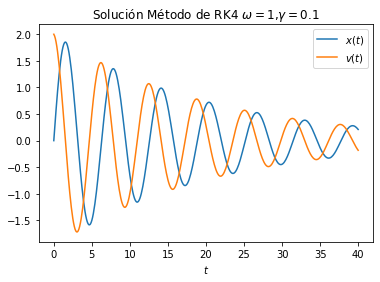

In [5]:
gamma=0.1 #Fricción
omega=1 #Frecuencia natural

dt=0.1
t0=0
tf=40

t=np.arange(t0,tf+dt,dt)   
x=np.zeros(len(t))  #donde se va a guardar los resultados después de usar RK4
v=np.zeros(len(t))

x[0]=0  # Condiciones iniciales del sistema 
v[0]=2

y=[x[0],v[0]]  # concatenando esas condiciones

for i in range(len(t)-1):
    y=RK4(function,y,t[i],dt) #y_{i+1}  
    x[i+1]=y[0]   
    v[i+1]=y[1]
    
plt.figure()
plt.plot(t,x,label='$x(t)$')
plt.plot(t,v,label='$v(t)$')
plt.title('Solución Método de RK4 $\omega=%s$,$\gamma=%s$'%(omega,gamma))
plt.xlabel('$t$')
plt.legend()

Grafique el espacio de fase del oscilador en las 4 regiones dinámicas posibles

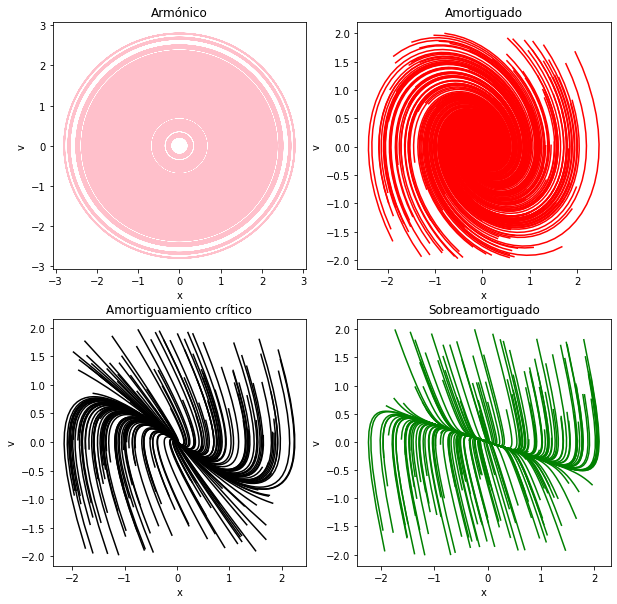

In [6]:
fig,axs=plt.subplots(2,2,figsize=(10,10),sharey=False)

omega=1  #omega**2 = k/m
m=1
gammas=[0,2*m*omega+1.5,2*m*omega,2*m*omega-1.5] 

for gamma in gammas:
  dt=0.1
  t0=0
  tf=40
  
  t=np.arange(t0,tf+dt,dt)
  x=np.zeros(len(t))
  v=np.zeros(len(t))
  
  Ns=200 #Start
  x0s=np.random.uniform(-2,2,Ns)  # Generando condiciones iniciales aleatorias en el intervalo (-2,2)
  v0s=np.random.uniform(-2,2,Ns)
  
  for j in range(Ns): # Realizando para cada condición inicial la respectiva solución de movimiento
    x[0]=x0s[j]  
    v[0]=v0s[j]
    
    y=[x[0],v[0]]
    for i in range(len(t)-1):
      y=RK4(function,y,t[i],dt)
      x[i+1]=y[0]
      v[i+1]=y[1]

    ############ Gráfico ################

    if gamma==gammas[0]: 
      axs[0,0].plot(x,v,color='pink')   # Gráficando según el caso en una posición del subplot
      axs[0,0].set_title("Armónico")
      axs[0,0].set_xlabel('x')
      axs[0,0].set_ylabel('v')

    elif gamma==gammas[3]:
      axs[0,1].plot(x,v,color='red')
      axs[0,1].set_title("Amortiguado")
      axs[0,1].set_xlabel('x')
      axs[0,1].set_ylabel('v')

    elif gamma==gammas[2]:
      axs[1,0].plot(x,v,color='black')
      axs[1,0].set_title("Amortiguamiento crítico")
      axs[1,0].set_xlabel('x')
      axs[1,0].set_ylabel('v')

    elif gamma==gammas[1]:
      axs[1,1].plot(x,v,color='green')
      axs[1,1].set_title("Sobreamortiguado")
      axs[1,1].set_xlabel('x')
      axs[1,1].set_ylabel('v')

Concluya brevemente con un análisis físico de sus resultados.

Por medio de la gráfica del espacio de fase se puede estudiar la dinámica del sistema. En el espacio de fase de un oscilador armónico se encuentra trayectorias circulares que reflejan un movimiento periódico que se modela con senos o cosenos y ádemas la energía mécanica del sistema se conserva.

Siguiendo con el oscilador amortiguado, se refleja un movimiento en el cual la energía mécanica del sistema disminuye debido a algún tipo de rozamiento por tanto llega un momento t donde el sistema llega a un estado de reposo.

Con el Amortiguamiento crítico, se observa que el sistema converge con mayor rapidez a un estado de reposo que con el oscilador amortiguado y ádemas no realiza un movimiento con ceros periódicos como lo sería el seno o coseno, sino que  a medida que avanza el tiempo tiende a un solo cero como se comporta un exponencial.

Por último el caso de Sobreamortiguado es similar al comportamiento del Amortiguamiento crítico, excepto que este se demora mas tiempo en llegar al estado de reposo.